# Keras_Mnist_CNN

In [1]:
from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

D:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


 # 資料預處理

In [2]:
(x_Train, y_Train), (x_Test, y_Test) = mnist.load_data()

In [3]:
x_Train4D=x_Train.reshape(x_Train.shape[0],28,28,1).astype('float32')
x_Test4D=x_Test.reshape(x_Test.shape[0],28,28,1).astype('float32')

In [4]:
x_Train4D_normalize = x_Train4D / 255
x_Test4D_normalize = x_Test4D / 255

In [5]:
y_TrainOneHot = np_utils.to_categorical(y_Train)
y_TestOneHot = np_utils.to_categorical(y_Test)

# 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

In [7]:
model = Sequential()

In [8]:
model.add(Conv2D(filters=16,
                 kernel_size=(5,5),
                 padding='same',
                 input_shape=(28,28,1), 
                 activation='relu'))

In [9]:
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

In [10]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               401536    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total para

# 訓練模型

In [11]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy']) 

In [12]:
train_history=model.fit(x=x_Train4D_normalize,y=y_TrainOneHot,validation_split=0.2,epochs=20, batch_size=300,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
 - 15s - loss: 0.5269 - acc: 0.8408 - val_loss: 0.1638 - val_acc: 0.9547
Epoch 2/20
 - 15s - loss: 0.2094 - acc: 0.9359 - val_loss: 0.1021 - val_acc: 0.9701
Epoch 3/20
 - 16s - loss: 0.1497 - acc: 0.9549 - val_loss: 0.0798 - val_acc: 0.9772
Epoch 4/20
 - 17s - loss: 0.1246 - acc: 0.9629 - val_loss: 0.0685 - val_acc: 0.9803
Epoch 5/20
 - 16s - loss: 0.1062 - acc: 0.9683 - val_loss: 0.0602 - val_acc: 0.9813
Epoch 6/20
 - 17s - loss: 0.0926 - acc: 0.9723 - val_loss: 0.0579 - val_acc: 0.9828
Epoch 7/20
 - 18s - loss: 0.0847 - acc: 0.9742 - val_loss: 0.0523 - val_acc: 0.9846
Epoch 8/20
 - 17s - loss: 0.0779 - acc: 0.9761 - val_loss: 0.0491 - val_acc: 0.9858
Epoch 9/20
 - 17s - loss: 0.0713 - acc: 0.9776 - val_loss: 0.0456 - val_acc: 0.9859
Epoch 10/20
 - 17s - loss: 0.0649 - acc: 0.9798 - val_loss: 0.0457 - val_acc: 0.9854
Epoch 11/20
 - 17s - loss: 0.0611 - acc: 0.9812 - val_loss: 0.0439 - val_acc: 0.9868
Epoch 12/20
 - 17s - los

In [13]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

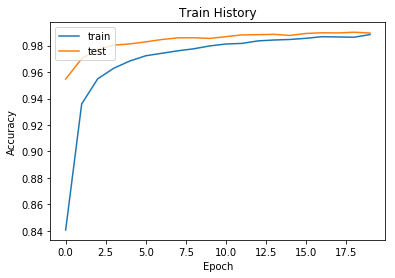

In [14]:
show_train_history('acc','val_acc')

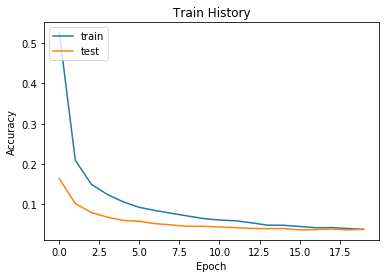

In [15]:
show_train_history('loss','val_loss')

# 評估模型準確率

In [16]:
scores = model.evaluate(x_Test4D_normalize , y_TestOneHot)
scores[1]

10000/10000 [==============================] - 2s 177us/step


0.989

# 預測結果

In [17]:
prediction=model.predict_classes(x_Test4D_normalize)
prediction[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

# 查看預測結果

In [18]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')

        ax.set_title("label=" +str(labels[idx])+",predict="+str(prediction[idx]),fontsize=10) 
        
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

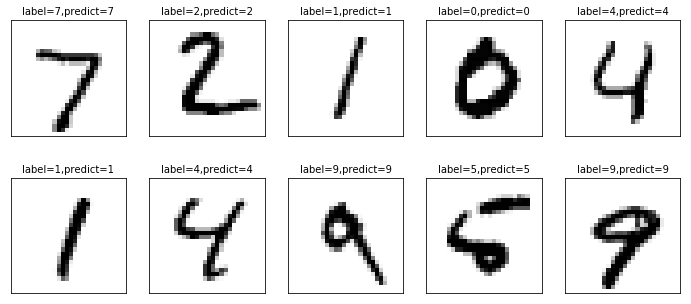

In [19]:
plot_images_labels_prediction(x_Test,y_Test,prediction,idx=0)

# confusion matrix

In [20]:
import pandas as pd
pd.crosstab(y_Test,prediction, rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,975,0,1,0,0,1,1,1,1,0
1,0,1127,1,2,0,1,2,1,1,0
2,2,0,1024,0,0,0,0,4,2,0
3,0,0,2,1002,0,3,0,1,2,0
4,0,0,1,0,974,0,1,0,0,6
5,2,0,0,5,0,883,2,0,0,0
6,6,2,0,0,1,4,942,0,3,0
7,1,0,8,2,0,0,0,1013,1,3
8,4,0,2,2,0,1,0,2,958,5


In [21]:
df = pd.DataFrame({'label':y_Test, 'predict':prediction})

In [22]:
df[(df.label==5)&(df.predict==3)]

,label,predict
340,5,3
1393,5,3
2035,5,3
4360,5,3
5937,5,3
